In [ ]:
#IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import datetime
import calendar
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#READING DATA SETS INTO DATA FRAME

In [54]:

data1=r'Comcast_telecom_complaints_data.csv'

df=pd.read_csv(data1)
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


### 1. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [ ]:
#CONVERTING Date_month_year COLUMN TO datetime DATA TYPE

In [55]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [ ]:
#EXTRACTING DAY, MONTH AND ABBREVATING THE MONTH. ADDING THEM TO COLUMNS

In [56]:
df['Date']=df['Date_month_year'].dt.day
df['Month']=df['Date_month_year'].dt.month.apply(lambda x: calendar.month_abbr[x])
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr
1,223441,Payment disappear - service got disconnected,4,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug
2,242732,Speed and Service,18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul
4,307175,Comcast not working and no service to boot,26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Feb
2220,318775,Comcast Monthly Billing for Returned Modem,6,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Feb
2221,331188,complaint about comcast,6,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Sep
2222,360489,Extremely unsatisfied Comcast customer,23,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Jun


In [ ]:
#COUNTING COMPLAINTS IN EACH MONTH AND PRESENTING IN DATAFRAME.

In [57]:
monthly_comp=df['Month'].value_counts().to_frame()
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_comp = monthly_comp.reindex(new_order, axis=0).reset_index().rename(columns={'index':'Month','Month':'no. of complaints'})
monthly_comp

,Month,no. of complaints
0,Jan,55
1,Feb,59
2,Mar,45
3,Apr,375
4,May,317
5,Jun,1046
6,Jul,49
7,Aug,67
8,Sep,55
9,Oct,53


In [ ]:
#COUNTING DAILY COMPLAINTS IN A MONTH AND SHOWING IN DATA FRAME.

In [58]:
daily_comp=df.groupby(by=['Month','Date']).count()['City'].to_frame().reset_index().rename(columns={'City':'no. of complaints'})
daily_comp

,Month,Date,no. of complaints
0,Apr,4,12
1,Apr,5,12
2,Apr,6,12
3,Apr,13,24
4,Apr,14,23
...,...,...,...
86,Oct,5,7
87,Oct,6,25
88,Sep,4,21
89,Sep,5,11


In [ ]:
#PLOTTING TREND CHART

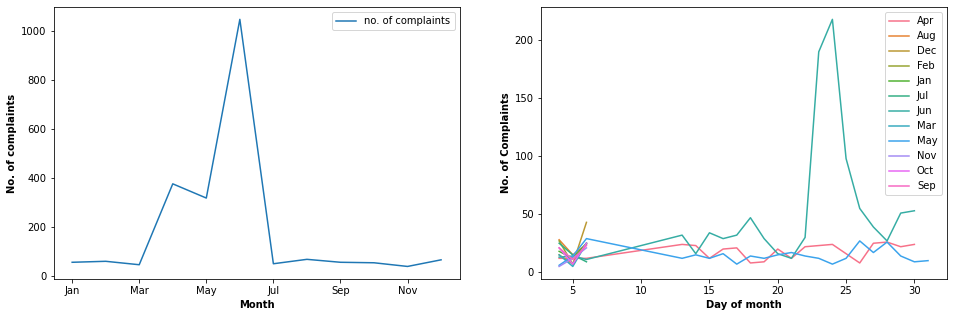

In [59]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

monthly = monthly_comp.plot.line(x='Month',y='no. of complaints',ax=ax[0])
monthly.set_xlabel('Month',weight='bold')
monthly.set_ylabel('No. of complaints',weight='bold')
#monthly.set_title('Yearly complaints',weight='bold')

daily = sns.lineplot(x=daily_comp.Date,y=daily_comp['no. of complaints'],hue=daily_comp.Month,ax=ax[1])
daily.set_xlabel('Day of month',weight='bold')
daily.set_ylabel('No. of Complaints',weight='bold')
daily.legend(loc='upper right')
#daily.set_title('Monthly complaints in 2015',weight='bold')

plt.show()

### 2.Provide a table with the frequency of complaint types.

In [60]:
df_comp_freq=df['Customer Complaint'].value_counts().to_frame().reset_index().rename(columns={'index':'Complaint Type','Customer Complaint':'Frequency'})
df_comp_freq

,Complaint Type,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
...,...,...
1836,Comcast Internet Only Service,1
1837,Suspected Throttling,1
1838,Xfinity/comcast Service,1
1839,Improper billing from Comcast,1


### 3.Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [ ]:
#REPLACING COMCAST WITH '' AND DELETING THAT COUNT AS ITS NOT A CLEAR DOMAIN.

In [61]:
df['revised comp'] = df['Customer Complaint'].apply(lambda x : x.upper().replace('COMCAST', ''))
df['revised comp']
df_domain=df['revised comp'].value_counts(ascending=False).to_frame().reset_index().rename(columns={'index':'Domain','revised comp':'comp counts'})
df_domain.drop(labels=0,axis=0,inplace=True)
df_domain

,Domain,comp counts
1,DATA CAP,30
2,INTERNET,29
3,DATA CAPS,21
4,BILLING,18
5,INTERNET SPEED,15
...,...,...
1735,FALSE BILLING,1
1736,DISCONTINUATION OF SERVICE ISSUE,1
1737,UNAUTHORIZED 2-YEAR CONTRACT WITH,1
1738,INTERNET PRICING /COMPETITION,1


In [ ]:
#PRINTING DOMAIN HAVING MAXIMUM COMPLAINTS 

In [62]:
df_domain_max=df_domain.iloc[0]
df_domain_max

Domain          DATA CAP
comp counts           30
Name: 1, dtype: object

###  4.Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.### 

In [63]:
df['updated status']=["Open" if x=="Open" or x=="Pending" else "Closed" for x in df['Status']]
df['updated status'].unique()
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,revised comp,updated status
0,250635,Comcast Cable Internet Speeds,22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,CABLE INTERNET SPEEDS,Closed
1,223441,Payment disappear - service got disconnected,4,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,PAYMENT DISAPPEAR - SERVICE GOT DISCONNECTED,Closed
2,242732,Speed and Service,18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,SPEED AND SERVICE,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,IMPOSED A NEW USAGE CAP OF 300GB THAT PUNISHE...,Open
4,307175,Comcast not working and no service to boot,26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,NOT WORKING AND NO SERVICE TO BOOT,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Feb,SERVICE AVAILABILITY,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,6,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Feb,MONTHLY BILLING FOR RETURNED MODEM,Closed
2221,331188,complaint about comcast,6,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Sep,COMPLAINT ABOUT,Closed
2222,360489,Extremely unsatisfied Comcast customer,23,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Jun,EXTREMELY UNSATISFIED CUSTOMER,Closed


###  5.Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [ ]:
#COUNTING OPEN AND CLOSED COMPLAINTS FOR EACH STATE

In [64]:
df.groupby(['State','updated status']).count()['City'].to_frame()


City
State         updated status      
Alabama       Closed            17
              Open               9
Arizona       Closed            14
              Open               6
Arkansas      Closed             6
...                            ...
Virginia      Open              11
Washington    Closed            75
              Open              23
West Virginia Closed             8
              Open               3

[77 rows x 1 columns]

In [67]:
State_newstatus = pd.crosstab(df['State'],df['updated status'])
State_newstatus

updated status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<Figure size 7200x1080 with 0 Axes>

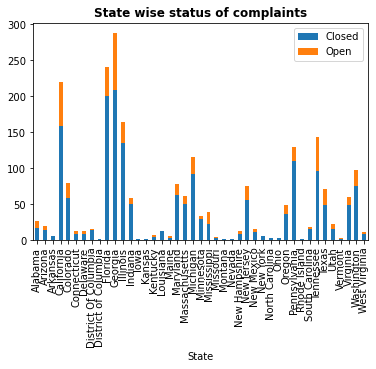

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize=(100,15))

State_newstatus.plot(kind='bar',stacked=True)
plt.title('State wise status of complaints',weight='bold')
plt.legend(loc='best')

plt.show()
plt.tight_layout()

###  6.Which state has the maximum complaints

In [69]:
max_state_comp=df['State'].value_counts()[df['State'].value_counts()==df['State'].value_counts().max()]
max_state_comp.to_frame().reset_index().rename(columns={'index':'State','State':'Complaints'})

,State,Complaints
0,Georgia,288


###  7.Which state has the highest percentage of unresolved complaints

In [70]:

df3=df[df['updated status'] =='Open']
df4=df3['State'].value_counts(normalize=True).reset_index().iloc[0]
df4


index     Georgia
State    0.154739
Name: 0, dtype: object

### 8. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [ ]:
#BREAK UP OF TOTAL COMPLAINTS RECEIVED VIA CALLS AND INTERNET

In [71]:
df_resolved=df[ (df['updated status']=='Closed') ]
c1=df.groupby(by='Received Via', as_index=True)['Ticket #'].count()
c1



Received Via
Customer Care Call    1119
Internet              1105
Name: Ticket #, dtype: int64

In [ ]:
#PERCENTAGE OF CLOSED COMPLAINTS

In [72]:
df_percentage=df.groupby(by='Received Via', as_index=True)['Ticket #'].count().apply(lambda x : x/c1.sum()*100)
df_percentage

Received Via
Customer Care Call    50.314748
Internet              49.685252
Name: Ticket #, dtype: float64